In [7]:
from flask import Flask, request, abort

from linebot import (
    LineBotApi, WebhookHandler
)
from linebot.exceptions import (
    InvalidSignatureError
)
from linebot.models import *

app = Flask(__name__)

# Channel Access Token
line_bot_api = LineBotApi('zvykbFvMNisU8IanOccs3CbjENjMhUmQL75DY79L7dRXn2px+USs5dbJslqNg7xk0P78nv/kqjYiBkVQQMLGFMDK+SAQv14/5MbEha1bG598a2wIoHMj6LLbgIEVV/AIBBEJ377voqvq52htlw+EwQdB04t89/1O/w1cDnyilFU=')
# Channel Secret
handler = WebhookHandler('6a56f77afa6cd45e5e6cb4eddd128f9e')

# 監聽所有來自 /callback 的 Post Request
@app.route("/callback", methods=['POST'])
def callback():
    # get X-Line-Signature header value
    signature = request.headers['X-Line-Signature']
    # get request body as text
    body = request.get_data(as_text=True)
    app.logger.info("Request body: " + body)
    # handle webhook body
    try:
        handler.handle(body, signature)
    except InvalidSignatureError:
        abort(400)
    return 'OK'

# 處理訊息
@handler.add(MessageEvent, message=TextMessage)
def handle_message(event):
    message = TextSendMessage(text=event.message.text)
    message2 = TextSendMessage(text="hello")
    line_bot_api.reply_message(event.reply_token, message2)

import os
if __name__ == "__main__":
    port = int(os.environ.get('PORT', 5000))
    app.run(host='0.0.0.0', port=port)



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [15/Apr/2021 13:25:27] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [15/Apr/2021 13:25:47] "GET /callback HTTP/1.1" 405 -


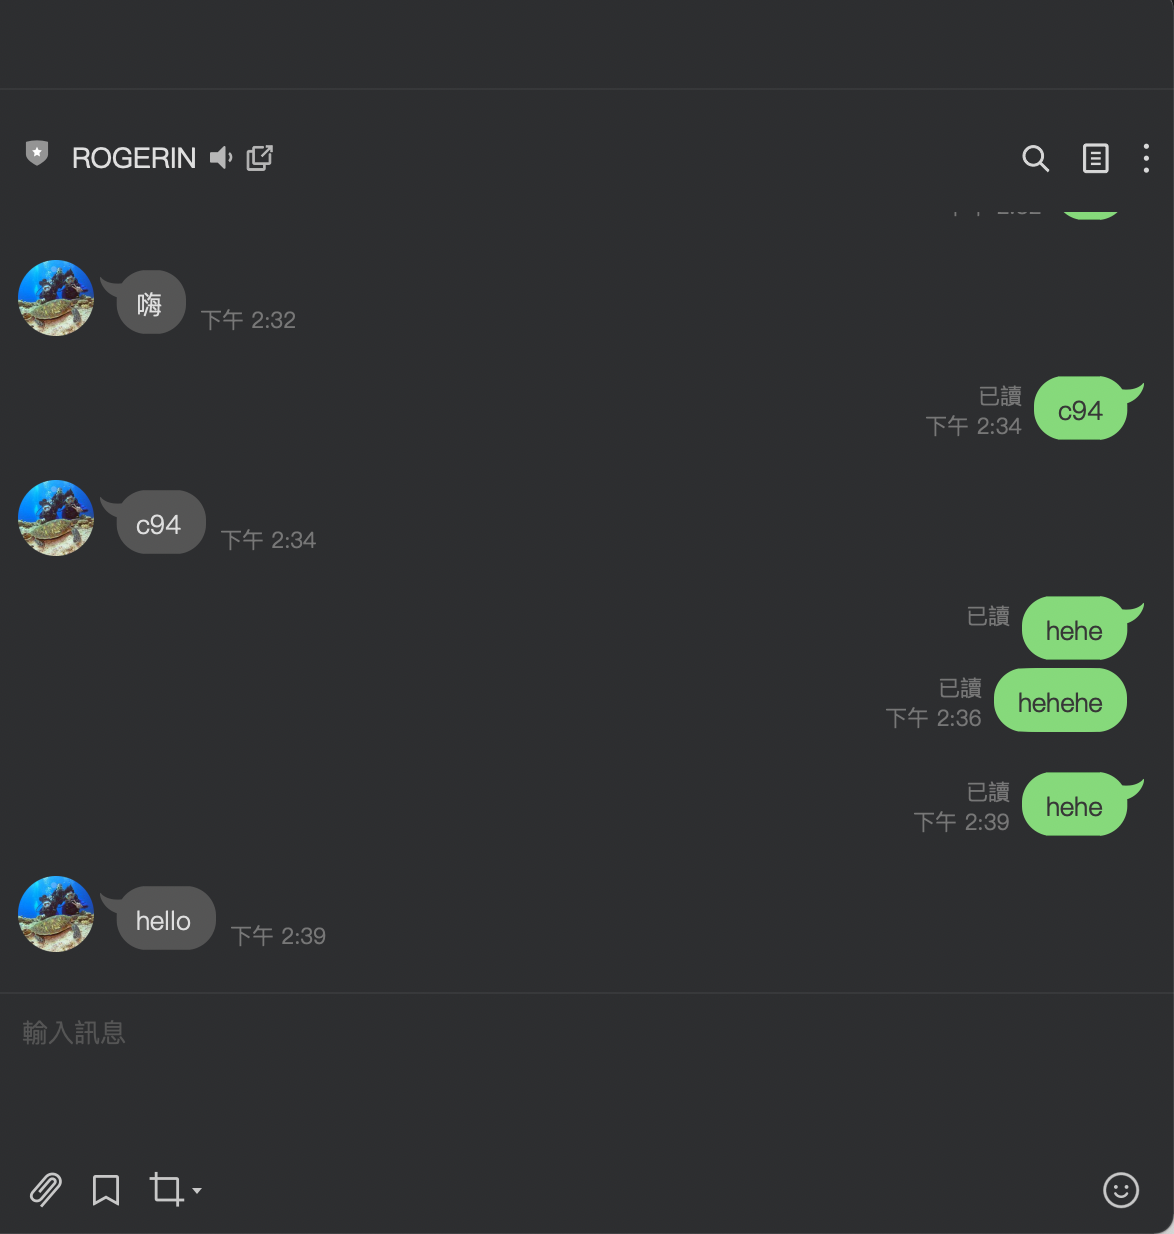

In [8]:
from IPython.display import Image
Image("/Users/lochien-min/Desktop/截圖 2021-04-15 下午2.58.17.png",width=500,height=500)